In [1]:
# import necessary libararies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Now import the Charts class
from plots import Charts
from cleaning import Cleaning

# charts = Charts(data)
# charts.correlation_heatmap()


In [4]:
# Path to save the CSV file for other notebook files 
csv_path = '../data/west_3_countries.csv'
data = pd.read_csv(csv_path)

In [5]:
chart = Charts(data)
cleaning = Cleaning(data)

In [6]:
data.shape

(1576800, 19)

In [7]:
# Replace negative values in DHI, DNI, and GHI with the minimum non-negative value
for col in ['DHI', 'DNI', 'GHI']:
    data[col] = data[col].clip(lower=0)

In [8]:
data.shape

(1576800, 19)

In [9]:
# Clean "cleaning the temperature sensors" column
col = 'Cleaning'
data[data[col] != 0][data[col] != 1].value_counts()

Series([], Name: count, dtype: int64)

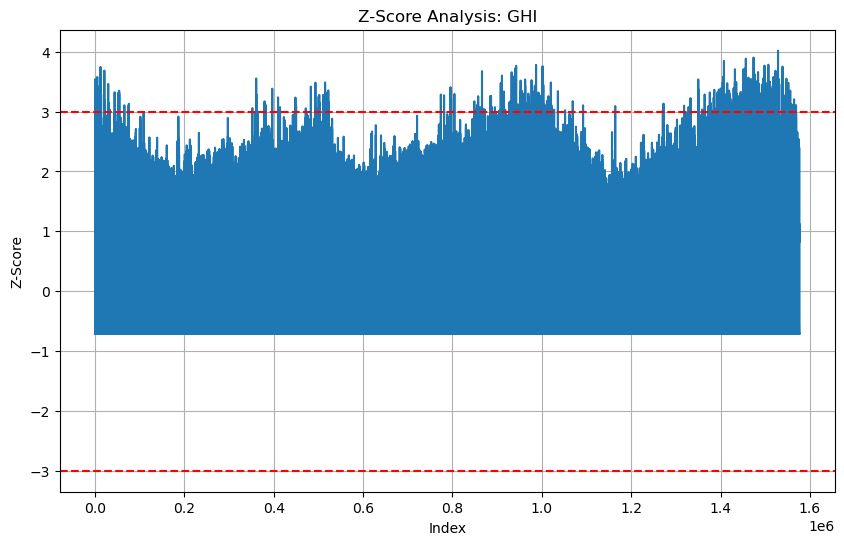

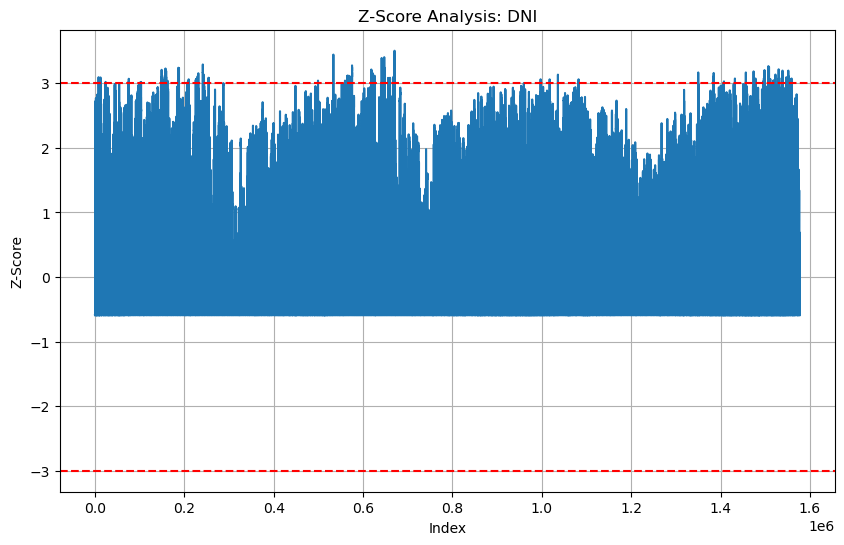

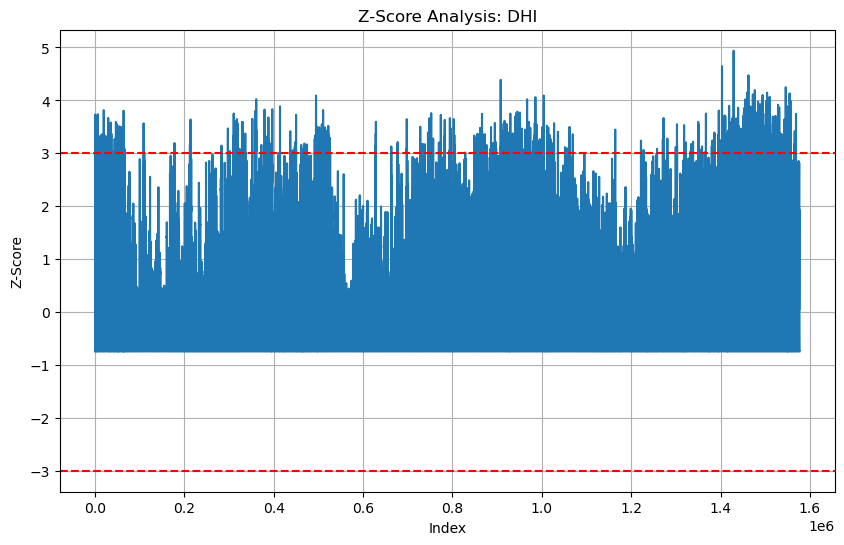

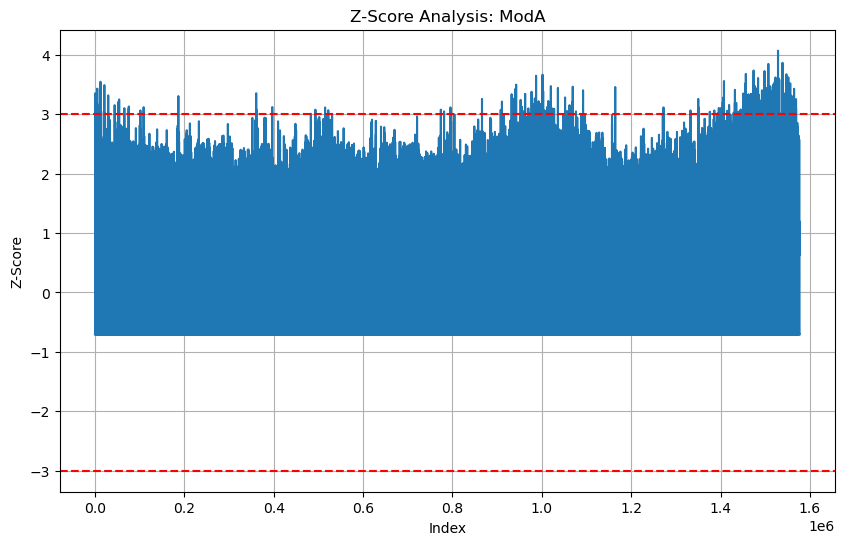

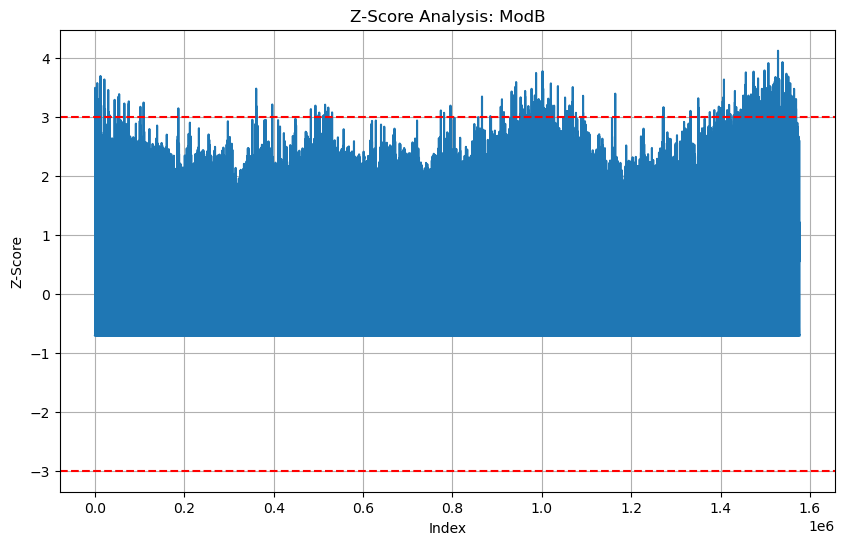

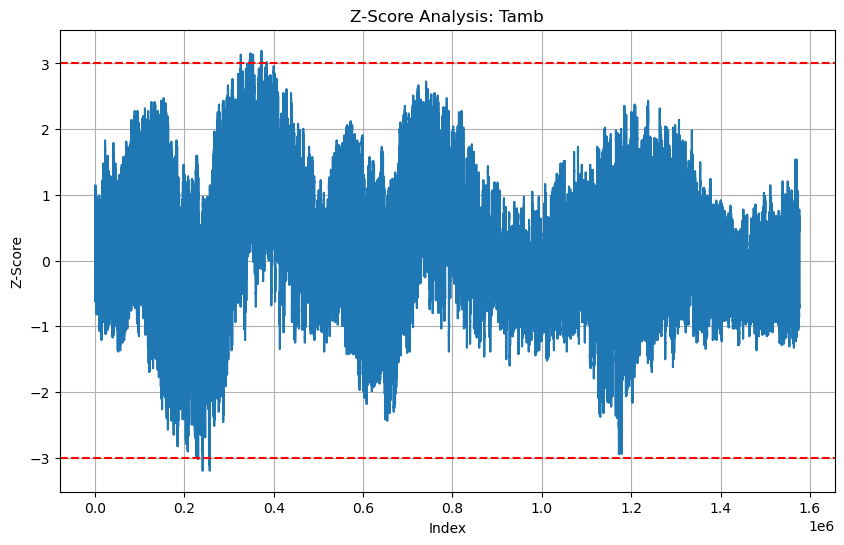

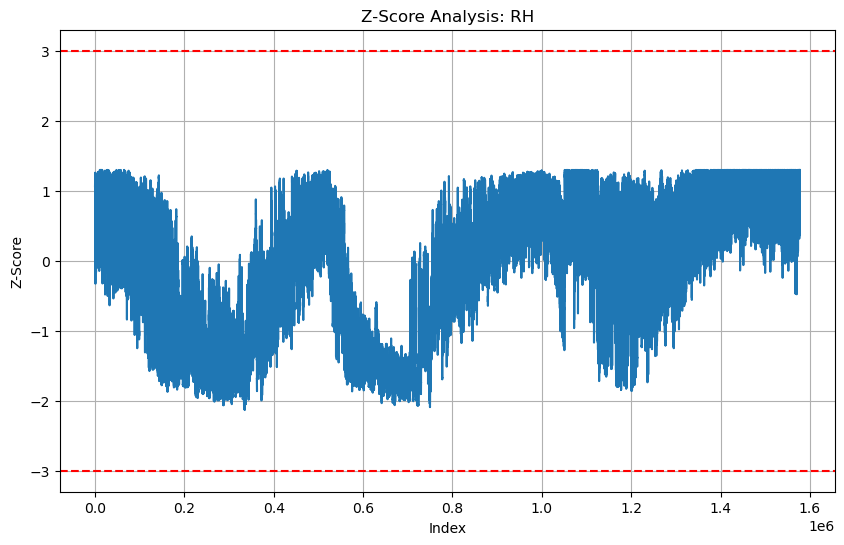

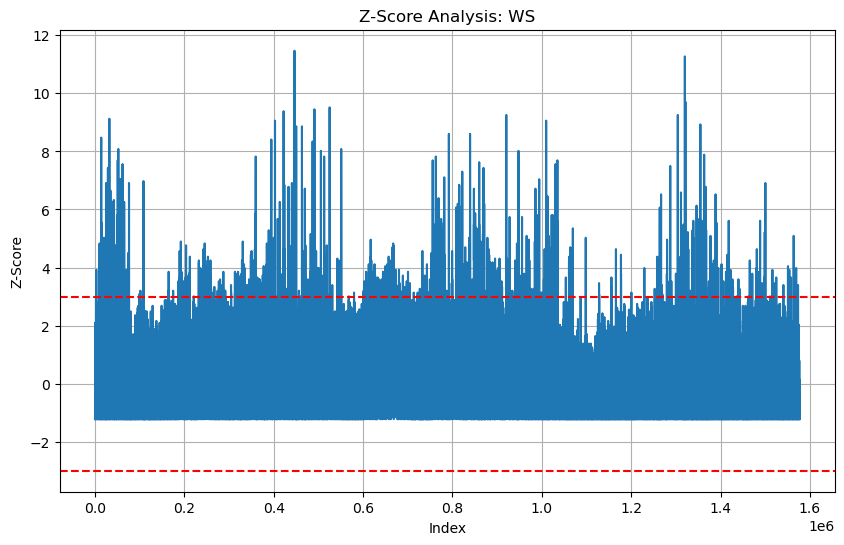

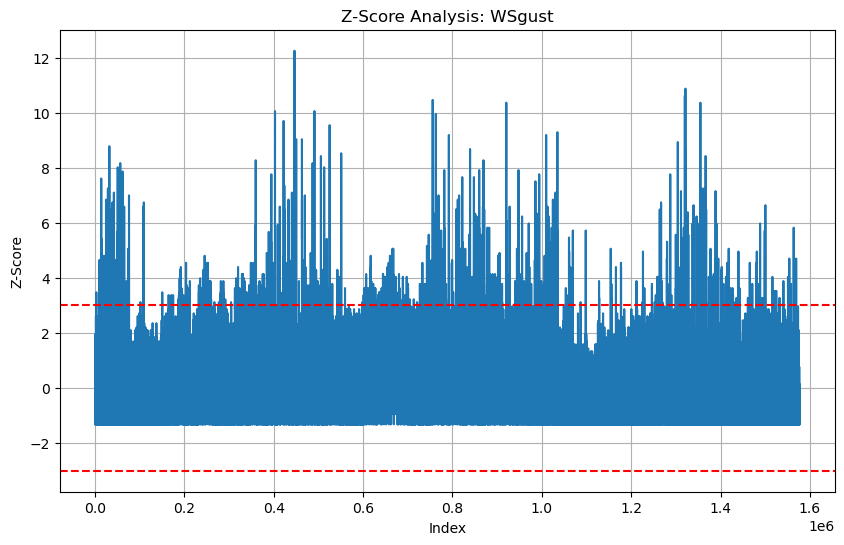

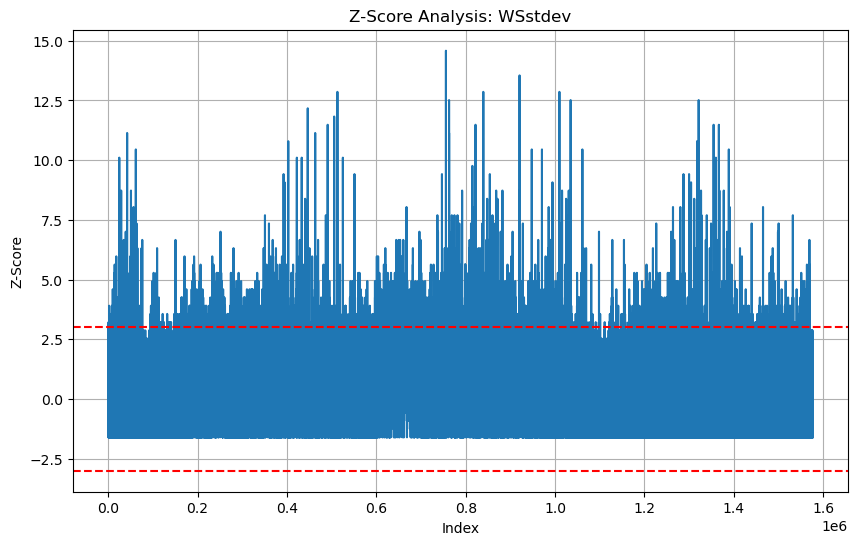

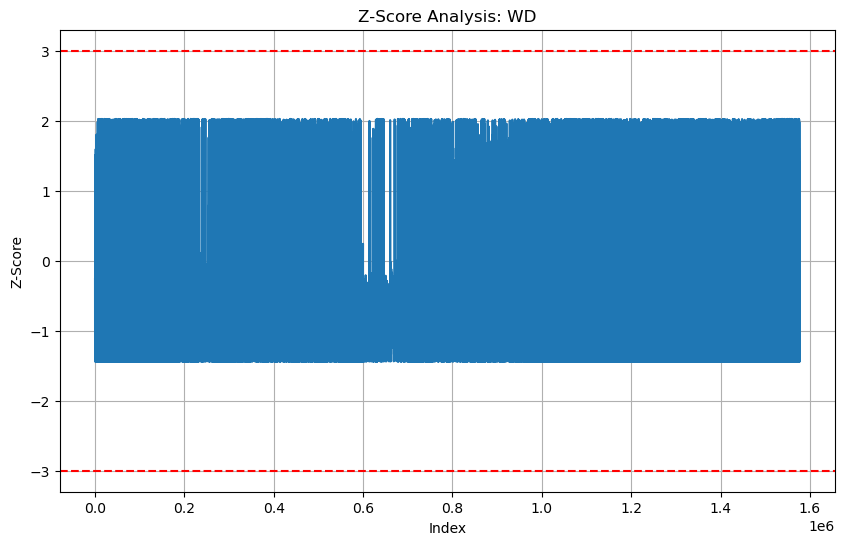

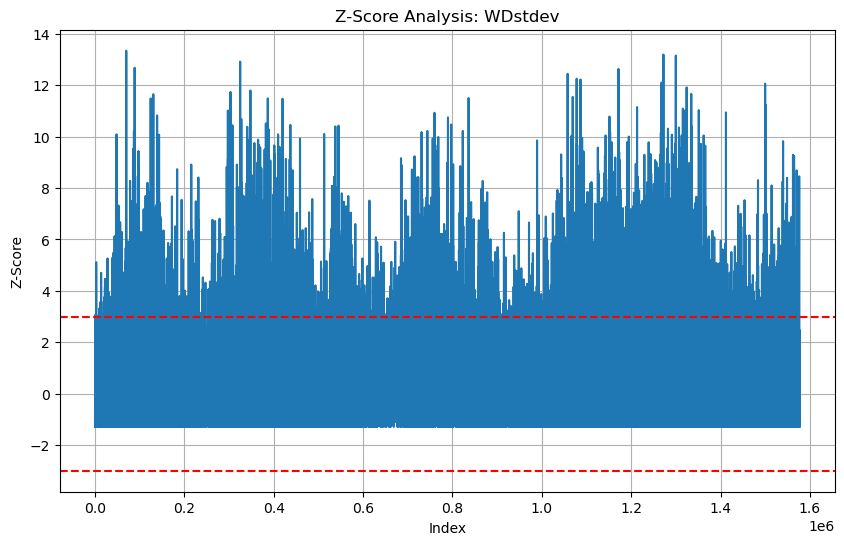

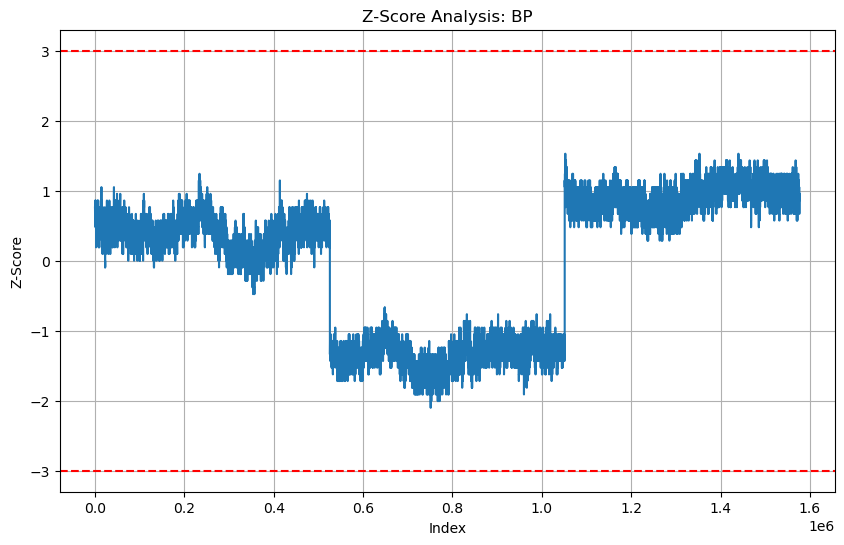

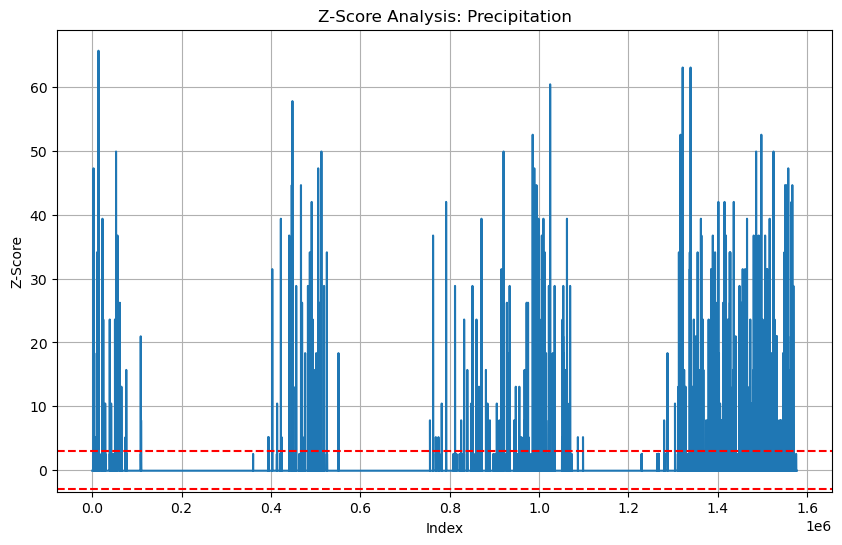

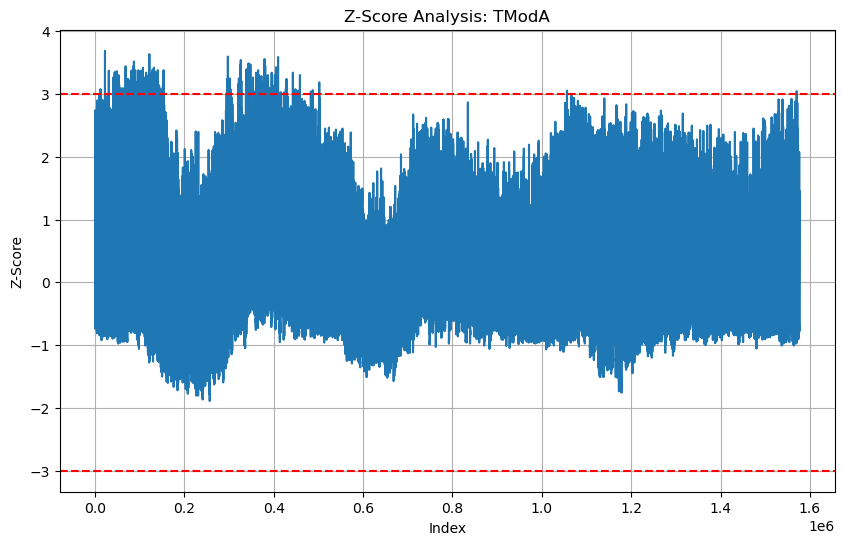

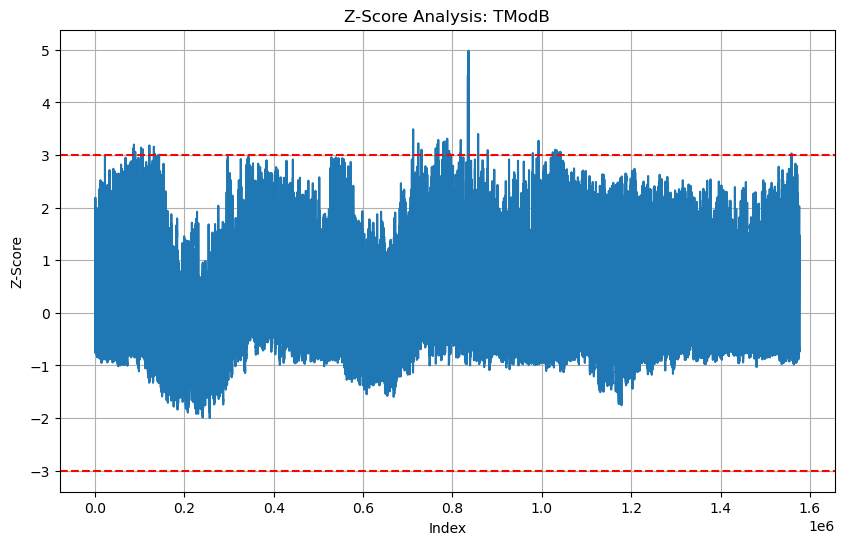

In [10]:
# Exclude percentage, country, timestamp, and other non-numeric columns
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
numeric_cols = [col for col in numeric_cols if col not in ['percent', 'country', 'timestamp', 'Cleaning']]

# Perform Z-score analysis on the remaining numeric columns
z_score_outliers = {}
for col in numeric_cols:
    chart.z_score_analysis(col, f"Z-Score Analysis: {col}")
    z_score_outliers[col] = sum(abs(data['z_score']) > 3)

In [11]:
# Display the number of outliers for each column
print("Number of Outliers:")
for col, num_outliers in z_score_outliers.items():
    if col in ['DHI', 'GHI', 'DNI', 'WS','ModA', 'ModB', 'WSstdev', 'WSgust', 'WDstdev']:
        df.loc[outliers, col] = cleaning.impute_by_upper_quartile(col)
    elif col in ['Tamb', 'TModA', 'TModB']:
        cleaning.impute_by_mean(col)
        
    print(f"{col}: {num_outliers}")

Number of Outliers:
GHI: 1685
DNI: 4375
DHI: 10518
ModA: 982
ModB: 1326
Tamb: 382
RH: 0
WS: 11173
WSgust: 10220
WSstdev: 10890
WD: 0
WDstdev: 12354
BP: 0
Precipitation: 6522
TModA: 3212
TModB: 1154


In [12]:
z_score_outliers = {}
for col in numeric_cols:
    cleaning.z_score_analysis(col)
    z_score_outliers[col] = sum(abs(data['z_score']) > 3)
    print(f"{col}: {z_score_outliers[col]}")

GHI: 1685
DNI: 4375
DHI: 10518
ModA: 982
ModB: 1326
Tamb: 382
RH: 0
WS: 11173
WSgust: 10220
WSstdev: 10890
WD: 0
WDstdev: 12354
BP: 0
Precipitation: 6522
TModA: 3212
TModB: 1154


# to maintain the overall shape of distributions I decided to use 
75% for 
the mean for.
